## Assignment 3
#### EP20BTECH11007
#### Gowri Govindaraj

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from scipy.stats import chi2
import seaborn as sns
sns.set_theme()
from scipy.stats import norm

# Q1

In [9]:
from astroML.resample import bootstrap
from astroML.stats import median_sigmaG

In [61]:
# Generate the data
samples = 1000
samples_bootstrap = 10000
x = np.random.normal(0, 1, size=samples)

# Compute the median and sigmaG
median, sigmaG = bootstrap(x, samples_bootstrap, median_sigmaG, kwargs= dict(axis=1))

x_grid = np.linspace(-1,1, 5000)
std = np.sqrt(np.pi/(2.0*1000))
pdf = norm(np.mean(median), std).pdf(x_grid)

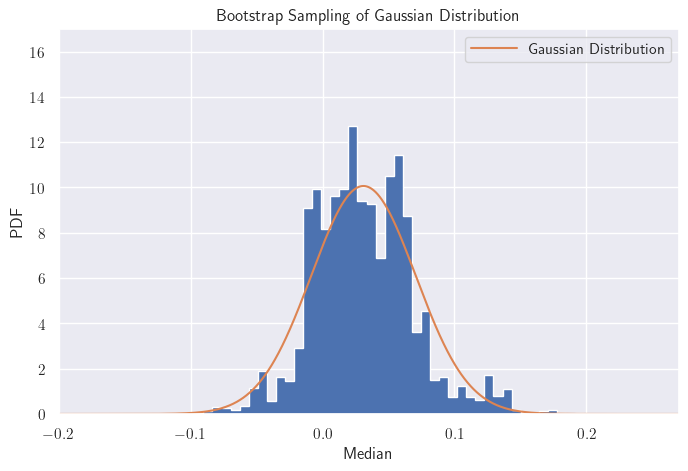

In [67]:
#Plotting the values
plt.figure(figsize=(8,5))
plt.hist(median, bins=50,histtype='stepfilled',density=True)
plt.plot(x_grid,pdf,label='Gaussian Distribution')
plt.xlim(-0.2, 0.27)
plt.ylim(0, 17)
plt.xlabel('Median')
plt.ylabel('PDF')
plt.title('Bootstrap Sampling of Gaussian Distribution')
plt.legend()
plt.show()


# Q2

In [69]:
from scipy.optimize import curve_fit

In [70]:
# Data from the paper
data = [[5 ,203 ,495 ,21 ,5 ,-0.33],
[6 ,58 ,173 ,15 ,9 ,0.67],
[7 ,210 ,479 ,27 ,4 ,-0.02],
[8 ,202 ,504 ,14 ,4 ,-0.05],
[9 ,198 ,510 ,30 ,11 ,-0.84],
[10 ,158 ,416 ,16 ,7 ,-0.69],
[11 ,165 ,393 ,14 ,5 ,0.30],
[12 ,201 ,442 ,25 ,5 ,-0.46],
[13 ,157 ,317 ,52 ,5 ,-0.03],
[14 ,131 ,311 ,16 ,6 ,0.50],
[15 ,166 ,400 ,34 ,6 ,0.73],
[16 ,160 ,337 ,31 ,5 ,-0.52],
[17 ,186 ,423 ,42 ,9 ,0.90],
[18 ,125 ,334 ,26 ,8 ,0.40],
[19 ,218 ,533 ,16 ,6 ,-0.78],
[20 ,146 ,344 ,22 ,5 ,-0.56]]

In [71]:
## Assigning the data to the variables
x = np.array(data)[:,1]
y = np.array(data)[:,2]
sigma_y = np.array(data)[:,3]

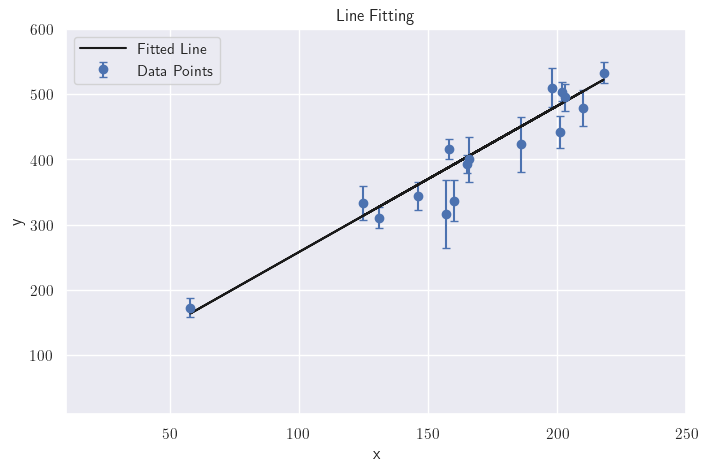

In [72]:
# Fitting the data
value = np.array([0,0])

def linear(x, a, b):
    return a*x + b
opt, cov = curve_fit(linear, x, y, value, sigma_y)

# Plotting the data
plt.figure(figsize=(8,5))
plt.errorbar(x, y, yerr=sigma_y, fmt='o',label='Data Points')
plt.plot(x, linear(x, *opt), 'k', label='Fitted Line')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(10,250)
plt.ylim(10,600)
plt.legend()
plt.title("Line Fitting")
plt.show()


# Q3

In [59]:
# Obtaining the chi-squared value and the p-value
chi_2_vals = np.array([0.96,0.24,3.84,2.85])*49

p = []

for i in range(4):
    p.append(stats.chi2(49).sf(chi_2_vals[i]))

print("The p-values are: ",p)

The p-values are:  [0.5529264339960217, 0.9999999917009567, 3.477504685373815e-18, 1.2107295923765585e-10]
